In [1]:
###############
# Import for old Way Keras
###############

import matplotlib.pyplot as plt
import numpy as np

#import mnist
from keras.datasets import mnist

import scipy.misc
import random as rand
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

Using TensorFlow backend.


In [2]:
################
# Get Data
###############
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


# Short hand for functions
regr = linear_model.LinearRegression()

In [3]:
#####################
# Reshape images to be a 2D array.
#####################
train = train_images.reshape(60000,28*28)

test = test_images.reshape(10000,28*28)

################# For Image 3 #################
[[8947   43]
 [ 356  654]]


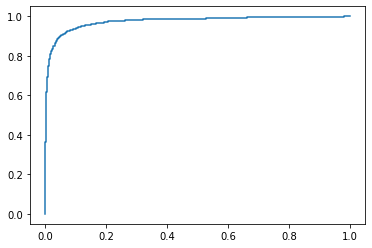

# of thresholds: 557
area under roc curve: 0.9738499322679767


In [4]:
################
# For 3
################
print('################# For Image 3 #################')
target = np.where(train_labels == 3,1,-1)

## regr = linear_model.LinearRegression() #its repetative to do this twice, but must use once in code
regr.fit(train, target)
predict_3 = regr.predict(test)

predict_labels = np.where(predict_3 > 0, 1, -1)
test_new = np.where(test_labels == 3, 1, -1)
cm = confusion_matrix(test_new,predict_labels)
print(cm)

FPR, TPR, thresholds = roc_curve(test_new, predict_3)
plt.plot(FPR,TPR)
plt.show()
print("# of thresholds:",len(thresholds))
area_under_curve = roc_auc_score(test_new, predict_3)
print("area under roc curve:",area_under_curve)

In [5]:
#################
## New MNIST KERAS
#################

##############
# keras imports for the dataset and building our neural network
##############
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
##############

# let's keep our keras backend tensorflow quiet
##############
import os
# Basically we want to control the log message output of our cells.
os.environ['TF_CPP_MIN_LOG_LEVEL']='3' 
#############


In [6]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(1, input_shape=(784,)))
model.add(Activation('linear'))                            


In [8]:
# compiling the sequential model
from keras.optimizers import SGD
import keras.losses as loss

model.compile(loss=loss.mean_squared_error, optimizer='sgd')

In [10]:
target = np.where(train_labels == 3,1,-1)

train = train_images.reshape(60000,28*28)/255

# training the model and saving metrics in history
history = model.fit(train, target,
          batch_size=128, epochs=20)
#### Validation - , finding accuracy from your testing data.
#### NP.WHERE 
#,
          #validation_data=(X_test, Y_test))

# saving the model
save_dir = ""
model_name = 'Test.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Epoch 1/20
60000/60000 [==============================] - 1s 14us/step - loss: nan
Epoch 2/20
60000/60000 [==============================] - 1s 13us/step - loss: nan
Epoch 3/20
60000/60000 [==============================] - 1s 13us/step - loss: nan
Epoch 4/20
60000/60000 [==============================] - 1s 14us/step - loss: nan
Epoch 5/20
60000/60000 [==============================] - 1s 13us/step - loss: nan
Epoch 6/20
60000/60000 [==============================] - 1s 14us/step - loss: nan
Epoch 7/20
60000/60000 [==============================] - 1s 16us/step - loss: nan
Epoch 8/20
60000/60000 [==============================] - 1s 16us/step - loss: nan
Epoch 9/20
60000/60000 [==============================] - 1s 17us/step - loss: nan
Epoch 10/20
60000/60000 [==============================] - 1s 18us/step - loss: nan
Epoch 11/20
60000/60000 [==============================] - 1s 15us/step - loss: nan
Epoch 12/20
60000/60000 [==============================] - 1s 13us/step - loss: nan
E

In [ ]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [ ]:

history_dict = history.history
print(history_dict.keys())